## Social Data Minning MidTerm.
### Grp2

In [1]:
## Import the required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn import metrics
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from collections import Counter
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/m.mraisi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/m.mraisi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
## Load the Dataset
pd.set_option('display.max_colwidth', 3000)
df = pd.read_csv('data_group2.csv')
original_data = df.copy()
df.columns = ["index","raw"]

In [3]:
df.head()

,index,raw
0,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .
1,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company ."
2,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses ."
3,4,"FIRST WISCONSIN & lt ; FWB > TO BUY MINNESOTA BANK First Wisconsin Corp said it plans to acquire Shelard Bancshares Inc for about 25 mln dlrs in cash , its first acquisition of a Minnesota - based bank . First Wisconsin said Shelard is the holding company for two banks with total assets of 168 mln dlrs . First Wisconsin , which had assets at yearend of 7 . 1 billion dlrs , said the Shelard purchase price is about 12 times the 1986 earnings of the bank . It said the two Shelard banks have a total of five offices in the Minneapolis - St . Paul area ."
4,5,"& lt ; MERIDIAN ENERGY >, CASTONE END LETTER OF INTENT & lt ; Meridian Energy Inc > and Castone Development Corp , a privately - held company , jointly announced that they have decided to terminate the letter of intent under which Meridian would have acquired Castone ."


In [4]:
df["raw"][0] ### data before pre-processing

"NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock ."

In [5]:
# define the regular expression patterns we want to look for
START_OF_LINE = "^"
OPTIONAL = "?"
ANYTHING = "."
ZERO_OR_MORE = "*"
ONE_OR_MORE = "+"

SPACE = "\s"
ATSIGN = '@\w+' #looking for any string which starts with @
PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
SPACES = SPACE + ONE_OR_MORE
NOT_SPACE = "[^\s]" + ONE_OR_MORE
EVERYTHING_OR_NOTHING = ANYTHING + ZERO_OR_MORE
ERASE = ""
FORWARD_SLASH = "\/"
NEWLINES = "[\r\n]"
RE_TWEET = START_OF_LINE + "rt" + SPACES
HASH = "#\w+"
HYPERLINKS = ("http" + "s" + OPTIONAL + ":" + FORWARD_SLASH + FORWARD_SLASH + NOT_SPACE + NEWLINES + ZERO_OR_MORE)

#replace the regular expression patterns with nothing (i.e., remove them)
df['ptext'] = df['raw'].str.lower() ## first lower all the words in the text.
#apply(lambda ...) is applying an operation on each row 
df['ptext'] = df['ptext'].apply(lambda x: re.sub(RE_TWEET, ERASE, x))## erase all retweet based on teh pattern in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub(HYPERLINKS, ERASE, x))## erase all Hyperlinks in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub(HASH, ERASE, x)) ## erase all hash in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub(ATSIGN, ERASE, x))## erase all @ signs in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub(PUNCTUATION, ERASE, x))## erase all PUNCTUATION signs in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub('\n', ' ', x))## erase all new lines in the text if any exist
df['ptext'] = df['ptext'].apply(lambda x: re.sub(r'[-+]?([0-9]*\.?[0-9]+)(?:[eE][-+]?[0-9]+)?','',x))## erase all numbers in the text if any exist
stop = stopwords.words('english') 
df['ptext'] = df['ptext'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop])) ##remove all stop words in the text

df["ptext"][70]

'btr nylex raises offer borg warner australia lt btr nylex ltd said increase takeover offer borg warner corp lt bor listed unit lt borg warner australia ltd bwa five dlrs four dlrs issued ordinary preference shares new offer values diversified auto parts manufacturer mln ordinary shares mln first participating preference shares mln dlrs formal documents sent shareholders soon possible said brief statement btr nylex manufactures rubber plastic products first bid bwa late january previously reported borg warner corp owns pct bwa ordinary shares pct preferences advised month ago would accept offer meant btr nylex pct acceptance condition could met bwa said statement reporting parent decision bwa advised shareholders ignore offer said parties expressed interest bidding bid yet emerged btr nylex pct owned listed subsidiary britain btr plc lt btrx lon'

In [6]:
# let's check the most frequant words to cehck if any further preprocessing is needed
#what are the most common words?
joined_text = ' '.join(df['ptext'])
pd.Series(joined_text.split()).value_counts()[:50]

said             3565
lt               2032
dlrs             1457
mln              1238
company          1167
inc              1026
pct               989
shares            935
corp              832
offer             699
share             622
group             605
would             598
stock             553
co                468
merger            447
stake             443
acquisition       434
unit              367
also              363
common            351
ltd               328
sale              308
new               306
shareholders      305
board             301
bank              299
buy               296
sell              294
one               288
u                 277
cash              272
agreement         256
acquire           252
year              250
investment        237
dlr               237
business          237
bid               235
two               231
purchase          230
international     229
last              225
assets            224
price             223
exchange  

In [7]:
## Let's extend the stop words and do further preprocessing

stopwords = nltk.corpus.stopwords.words('english')
sw1 = ['dont','im','also','it','thank','thanks','could','get','would',
       'even','know','say','much','well','co', 'lt','u', 'dlrs', 'dollars']
stopwords.extend(sw1)
# stemmer = PorterStemmer()
df['ptext'] = df['ptext'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stopwords]))
 ## removing the commoner morphological and inflexional endings from words (ex. likes -- like, liking - like)
# df['ptext'] = df['ptext'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x.split()]))

df['ptext'] = df['ptext'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stopwords]))

df["ptext"][70]

'btr nylex raises offer borg warner australia btr nylex ltd said increase takeover offer borg warner corp bor listed unit borg warner australia ltd bwa five four issued ordinary preference shares new offer values diversified auto parts manufacturer mln ordinary shares mln first participating preference shares mln formal documents sent shareholders soon possible said brief statement btr nylex manufactures rubber plastic products first bid bwa late january previously reported borg warner corp owns pct bwa ordinary shares pct preferences advised month ago accept offer meant btr nylex pct acceptance condition met bwa said statement reporting parent decision bwa advised shareholders ignore offer said parties expressed interest bidding bid yet emerged btr nylex pct owned listed subsidiary britain btr plc btrx lon'

In [8]:
# let's check again the most frequant words to cehck if any further preprocessing is needed
#what are the most common words?
joined_text = ' '.join(df['ptext'])
pd.Series(joined_text.split()).value_counts()[:50]

said             3565
mln              1238
company          1167
inc              1026
pct               989
shares            935
corp              832
offer             699
share             622
group             605
stock             553
merger            447
stake             443
acquisition       434
unit              367
common            351
ltd               328
sale              308
new               306
shareholders      305
board             301
bank              299
buy               296
sell              294
one               288
cash              272
agreement         256
acquire           252
year              250
dlr               237
business          237
investment        237
bid               235
two               231
purchase          230
international     229
last              225
assets            224
exchange          223
price             223
per               220
securities        216
agreed            214
subsidiary        209
may               208
tender    

In [9]:
#number of unique words (this gives you the size of VOCABULARY)

text_list = df['ptext'].values.tolist()
joined_text = " ".join(text_list) # creates one big string from all the text
result = Counter(joined_text.split(" ")) #splits the string and counts unique items (i.e., words)
print(len(result.keys()))

7705


In [10]:
# build TF-IDF features for your dataset

## this step to convert text into numeric values
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
x = v.fit_transform(df['ptext'])
df_tfidf = pd.DataFrame(x.todense())

feature_names = v.get_feature_names()
dense = x.todense()
lst1 = dense.tolist()
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
df_tfidf

,aaix,aar,aarnoud,ab,abandoned,abatement,abide,ability,able,abort,...,yuear,zealand,zero,zico,zimbabwe,zimmer,zirconium,zuccherifici,zuckerman,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066721,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Let's split the data to train_data, and test_data .. %80 train and %20 test

train_data = df_tfidf[0:948]
test_data = df_tfidf[949:]

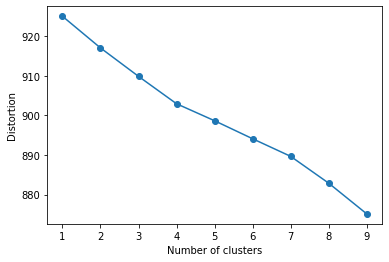

In [13]:
# Building the elbow graph for the k value
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 10):
    #'random' choose n_clusters observations (rows) at random from data for the initial centroids
    # Max_iter: Maximum number of iterations of the k-means algorithm for a single run.
    # random_state: Determines random number generation for centroid initialization.
    km = KMeans(
        n_clusters=i, init='random', max_iter=400, random_state=45
    )
    km.fit(train_data)
    distortions.append(km.inertia_)

# plotting the graph

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

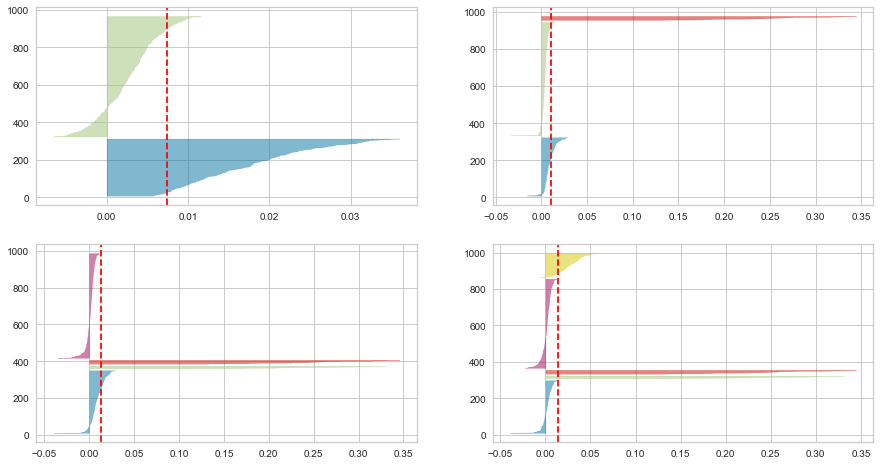

In [14]:
## let's use the Silhouett method as well to find the optimal number of clusters

## if the red line (avg Silhouett score) crosses them all then it's the best number of clusters
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='random', max_iter=400, random_state=45)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(train_data)


In [16]:
kmeans = KMeans(n_clusters=4,init='random', max_iter=400, random_state=45).fit(test_data)
labels =kmeans.predict(test_data)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

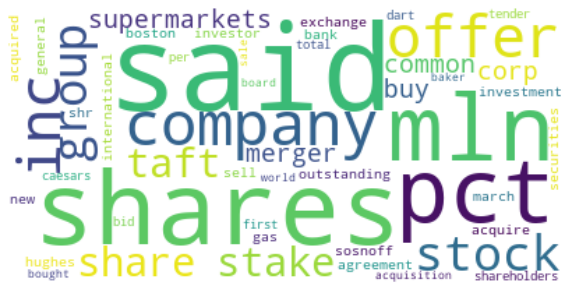

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# test_data_c = np.array(test_data)
#filter rows of original data
c0 = test_data[labels == 0] ## shares/stores
c1 = test_data[labels == 1] ## 
c2 = test_data[labels == 2] ## 
c3 = test_data[labels == 3] ## 

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c0.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


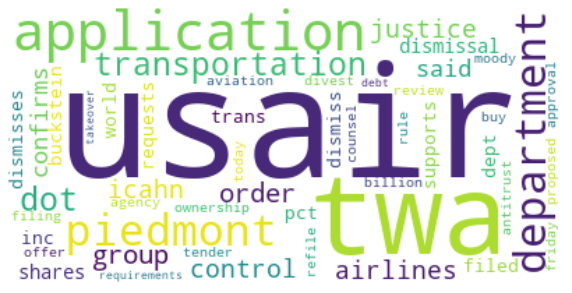

In [19]:
c0 = test_data[labels == 0] ## shares/stores
c1 = test_data[labels == 1] ## tranportation/airlines
c2 = test_data[labels == 2] ## 
c3 = test_data[labels == 3] ## 

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c1.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

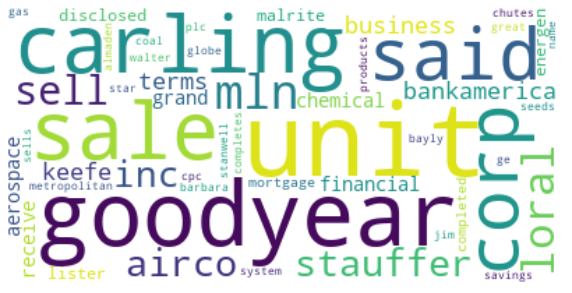

In [20]:
c0 = test_data[labels == 0] ## shares/stores
c1 = test_data[labels == 1] ## tranportation/airlines
c2 = test_data[labels == 2] ## sales
c3 = test_data[labels == 3] ## 

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c2.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

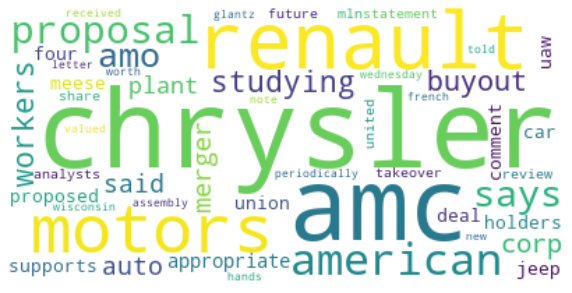

In [21]:
c0 = test_data[labels == 0] ## shares/stores
c1 = test_data[labels == 1] ## tranportation/airlines
c2 = test_data[labels == 2] ## sales
c3 = test_data[labels == 3] ## cars

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c3.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
unseen_text = ["the stores in canada are buying more shares from facebook"]
kmeans.predict(v.transform(unseen_text)) ## here it predicted teh correct cluster based on our analysis

array([0], dtype=int32)

In [25]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = test_data.columns
for i in range(4):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 said
 shares
 mln
 pct
 company
 offer
 inc
 stock
 group
 share
Cluster 1:
 usair
 twa
 application
 piedmont
 department
 transportation
 dot
 group
 order
 icahn
Cluster 2:
 unit
 goodyear
 carling
 sale
 said
 corp
 mln
 loral
 sell
 stauffer
Cluster 3:
 chrysler
 amc
 renault
 motors
 american
 proposal
 says
 amo
 studying
 workers


In [26]:
## Let's take the centroids

centroids = kmeans.cluster_centers_
centroid_labels = [centroids[i] for i in labels]
centroids

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  3.25260652e-19,  2.38071371e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -5.42101086e-20,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.71050543e-20,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  3.58195286e-03,  0.00000000e+00]])

In [27]:
## in this part we are using the scipy.spatial.distance to get the distances between the centroids and the docs 
from scipy.spatial.distance import cdist
dm = cdist(test_data, centroids)
dm[0]

array([0.99378541, 1.17508635, 1.0248437 , 1.18574549])

In [29]:
## creating a dataframe to collect the distances for each doc to their respective clusters
cluster_df = pd.DataFrame()
cluster_df['ptext'] = df['ptext'][949:]
cluster_df['clusters/labels'] = labels
cluster_df['distance'] = np.nan

for i,doc in enumerate(dm):
        cluster_df['distance'].iloc[i] = doc[cluster_df['clusters/labels'].iloc[i]]

cluster_df

,ptext,clusters/labels,distance
949,stone container sto completes waiting period stone container corp said southwest forest industries inc swf completed waiting period requirements hart scott rodino anti trust improvements act stone said proceed previously proposed acquisition southwest,0,0.993785
950,southwest swf stone sto comply merger southwest forest industries said stone container corp complied federal waiting period requirements stone proposed dlr per share cash acquisition southwest southwest currently mln shares outstanding companies entered merger agreement january made initial findings department justice federal trade commission february three southwest said waiting period expired march without receiving formal second request information reuter,0,0.983844
951,mar mar,0,1.009548
952,hawker siddeley offer clarostat clr ends hawker siddeley group plc offer share clarostat mfg inc stock scheduled expire est yesterday company officials unavailable comment american stock exchange stopped trading clarostat stock pending news announcement,0,0.991801
953,taft tfb given deadline buyout proposal narragansett capital inc narr said dudley taft requested response taft broadcasting march earlier today taft broadcasting said taft company vice chairman narragansett offered taft mln outstanding shares company said offer conditioned approval board spokesman declined comment whether board scheduled meeting narragansett taft group provide equity portion offer contributing least mln cash taft broadcasting common narragansett said said group advised first boston inc fbc first boston corp investment banker highly confident financing acquisition consummated narragansett said offer subject negotiation definitive merger agreement definitive financing agreements approval regulators taft board taft stockholders narragansett taft group said letter taft board states group intends return control significant portion company equity taft family providing stockholders means realizing attractive value shares,0,0.967957
...,...,...,...
1181,miller tabak pct penn traffic pnf miller tabak hirsch said received accepted common shares penn traffic response dlr per share tender offer expired friday together shares already owned pct penn traffic company said penn traffic expected hold special shareholders meeting later month approve merger miller tabak tender price said two miller tabak representatives named penn traffic board march four serve directors penn traffic president chief executive officer guido malacarne company said received financing transaction first national bank minneapolis salomon inc sb,0,0.988643
1182,taft broadcasting rejects dlr per share buyout offer theta corp taft broadcasting rejects dlr per share buyout offer theta corp,0,0.983560
1183,taft tfb rejects dlr shr offer taft braodacasting said board directors unanimously decided accept pending proposal theta corp investor group led dudley taft decision based among things advise financial advisors goldman sachs offer per share inadequate taft said board concluded offer failed recognize fully future propsects company directed management explore alternatives including possible financial restructuring,0,0.974815
1184,amc imposes hiring freeze due takeover bid american motors corp amo management ordered hiring freeze view chrysler corp c billion dlr takeover bid spokesman amc said analysts said merger virtually certain go ahead american motors directors met five hours wednesday review takeover proposal board expects meeting periodically next several weeks chrysler proposal amc said first formal statement since acknowledged chrysler proposal monday chrysler number three automaker said merger motivated principally desire acquire amc profitable jeep business dealers new modern car assembly plant bramalea ontario means guaranteed future amc leaves question fate many plus employees according industry analysts amc toledo ohio jeep plant hourly workers indefinite layoff kenosha wisconsin car plant an

In [30]:
## sorting the documents according to their distance to their respective centroid

cluster_df = cluster_df.sort_values(['clusters/labels', 'distance'])

In [31]:
cluster_df

,ptext,clusters/labels,distance
959,first women bank investor group offer expires investor group owning pct outstanding capital stock first women bank said cash tender offer bank remaining outstanding shares per share expired march three investors said shares pct outstanding tendered,0,0.959792
1021,allegheny int l ag first boston set merger allegheny international inc said entered agreement merge affiliate first boston inc fpc first boston corp transaction valued mln allegheny said agreement calls holders common receive share holders company cumulative preference shares receive share owning convertible preferred receive share allegheny international said agreement calls first boston affiliate start cash tender offer outstanding shares allegheny common cumulative preferred convertible preferred company said first boston committed provide financing necessary acquire securities tender offer estimated mln said agreement subject waiver march certain conditions company existing bank credit agreement allegheny international statement name describe first boston affiliate involved agreement offer company stock conditioned valid tender securities representing least majority voting power election directors company valid tender least two third outstanding cumulative preferred convertible preferred shares,0,0.962562
1007,sosnoff starts bid caesars world caw mts acquisition corp company formed martin sosnoff said started tender offer shares caesars world inc newspaper advertisement mts said offer withdrawal rights expire april three unless extended sosnoff new york investor already owns four mln caesars mln shares outstanding pct caesars largest shareholder caesars owns casino hotels nevada honeymoon resorts pennsylvania pocono mountains controls caesars new jersey inc cjn owns atlantic city n j casino hotel second quarter ended january caesars world earned mln revenues mln earnings revenues mln year fiscal company earned mln revenues mln mts said offer conditioned receipt least enough shares give sosnoff majority interest fully diluted basis arrangement sufficient financing buy caesars shares already owned pay related costs approval new jersey casino control commission nevada gaming commission state gaming control board mts said marine midland banks inc mm committed lend mln acquisition use best efforts syndicate another mln senior financing transaction said financial adviser painewebber group inc pwj stated writing subject market conditions highly confident arrange commitments mln mezzanine financing mts said expect problems obtaining new jersey nevada regulatory approval acquisition since ownership caesars stake already cleared june sosnoff requested seat caesars world board request yet granted september sosnoff chairman atalanta sosnoff capital corp filed clearance antitrust laws raise interest caesars world pct sosnoff said letter caesars world chairman chief executive officer henry gluck decision go directly shareholders made urging may financial legal advisors repeatedly stressed lack responsiveness management past sosnoff said made numerous efforts express views management ways maximizing shareholder values said caesars twicce refused request board seat advisers felt given advance notice used time throw obstacles offer rather giving serious consideration said sosnoff said hopes caesars world management willing negotiate acquisition agreement indicated publicly past believe operating management company performed appropriate consideration given significant equity interest company following acquisition sosnoff said letter gluck mts said sosnoff asked company fix march record date determination shareholders entitled authorize action without meeting including election removal directors,0,0.962927
1099,lindner says discussed control taft tfb financier carl lindner holds pct stake taft broadcasting told securities exchange commission discussed company possibility seeking control lindner cincinnati ohio investor controls american financial

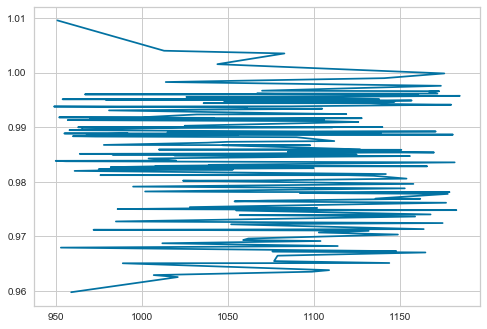

In [32]:
#Plot a curve which shows the distribution of these distances
## x-axis is the document index, and the y-axis is the distance from the centroid

plt.plot(cluster_df[cluster_df['clusters/labels']==0]['distance'])


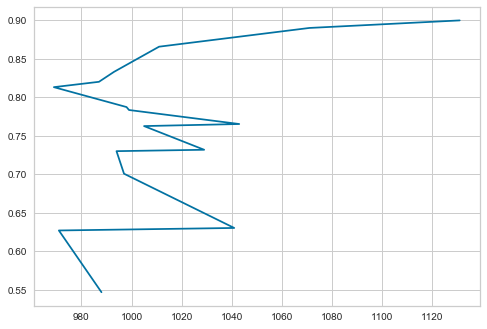

In [34]:
plt.plot(cluster_df[cluster_df['clusters/labels']==1]['distance'])

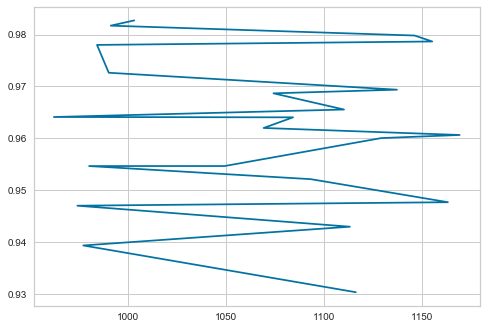

In [35]:
plt.plot(cluster_df[cluster_df['clusters/labels']==2]['distance'])

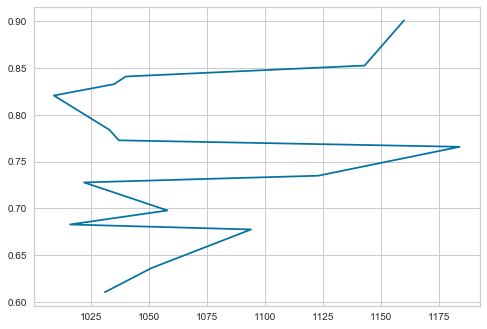

In [36]:
plt.plot(cluster_df[cluster_df['clusters/labels']==3]['distance'])